# Implementing Logistic Regression 

In [85]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelBinarizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib #To save the trained Model and all it's Parameter
%matplotlib inline

In [2]:
rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_6308\171121386.py:1: SyntaxWarning: invalid escape sequence '\D'
  rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')


| Feature         | Description                                                                                                  |
|-----------------|--------------------------------------------------------------------------------------------------------------|
| Date            | The date of observation                                                                                       |
| Location        | The common name of the location of the weather station                                                        |
| MinTemp         | The minimum temperature in degrees Celsius                                                                    |
| MaxTemp         | The maximum temperature in degrees Celsius                                                                    |
| Rainfall        | The amount of rainfall recorded for the day in mm                                                             |
| Evaporation     | The Class A pan evaporation (mm) in the 24 hours to 9am                                                       |
| Sunshine        | The number of hours of bright sunshine in the day                                                             |
| WindGustDir     | The direction of the strongest wind gust in the 24 hours to midnight                                          |
| WindGustSpeed   | The speed (km/h) of the strongest wind gust in the 24 hours to midnight                                       |
| WindDir9am      | Direction of the wind at 9am                                                                                  |
| WindDir3pm      | Direction of the wind at 3pm                                                                                  |
| WindSpeed9am    | Wind speed (km/h) averaged over 10 minutes prior to 9am                                                       |
| WindSpeed3pm    | Wind speed (km/h) averaged over 10 minutes prior to 3pm                                                       |
| Humidity9am     | Humidity (percent) at 9am                                                                                     |
| Humidity3pm     | Humidity (percent) at 3pm                                                                                     |
| Pressure9am     | Atmospheric pressure (hPa) reduced to mean sea level at 9am                                                   |
| Pressure3pm     | Atmospheric pressure (hPa) reduced to mean sea level at 3pm                                                   |
| Cloud9am        | Fraction of sky obscured by cloud at 9am, measured in "oktas" (eighths of the sky obscured by cloud)          |
| Cloud3pm        | Fraction of sky obscured by cloud at 3pm, measured in "oktas" (eighths of the sky obscured by cloud)          |
| Temp9am         | Temperature (degrees Celsius) at 9am                                                                         |
| Temp3pm         | Temperature (degrees Celsius) at 3pm                                                                         |
| RainToday       | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0                             |
| RainTomorrow    | The amount of next day rain in mm. Used to create the response variable RainTomorrow ("risk" measure)         |


In [3]:
rain_df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

In [4]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analying the unique values

In [5]:
for i in rain_df.drop(columns=['Date']).columns :
    if(rain_df[i].dtype==object):
        print(f"Unique Values in {i} is :{rain_df[i].unique()}")

Unique Values in Location is :['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique Values in WindGustDir is :['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique Values in WindDir9am is :['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique Values in WindDir3pm is :['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique Values in Ra

In [6]:
null_count=[]
for i in rain_df.columns:
    null_count.append(rain_df[i].isnull().sum())
    print(f"Null Values in {i} are : {rain_df[i].isnull().sum()}")
null_list=pd.Series(null_count,index=[x for x in rain_df.columns])

Null Values in Date are : 0
Null Values in Location are : 0
Null Values in MinTemp are : 1485
Null Values in MaxTemp are : 1261
Null Values in Rainfall are : 3261
Null Values in Evaporation are : 62790
Null Values in Sunshine are : 69835
Null Values in WindGustDir are : 10326
Null Values in WindGustSpeed are : 10263
Null Values in WindDir9am are : 10566
Null Values in WindDir3pm are : 4228
Null Values in WindSpeed9am are : 1767
Null Values in WindSpeed3pm are : 3062
Null Values in Humidity9am are : 2654
Null Values in Humidity3pm are : 4507
Null Values in Pressure9am are : 15065
Null Values in Pressure3pm are : 15028
Null Values in Cloud9am are : 55888
Null Values in Cloud3pm are : 59358
Null Values in Temp9am are : 1767
Null Values in Temp3pm are : 3609
Null Values in RainToday are : 3261
Null Values in RainTomorrow are : 3267


Comparing the Null Values Counts

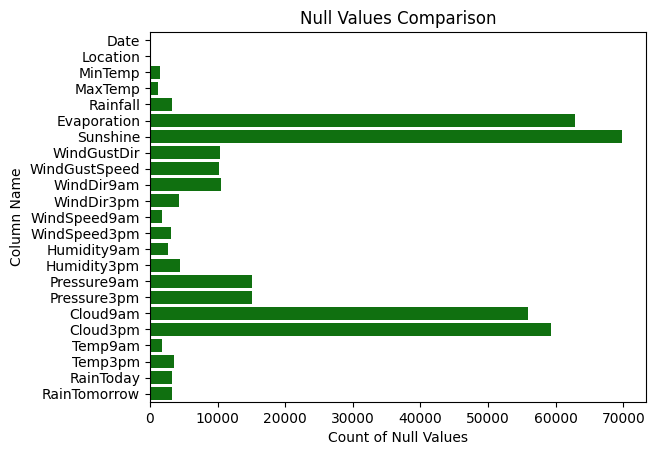

In [7]:
plt.title("Null Values Comparison")
plt.xlabel("Count of Null Values")
plt.ylabel("Column Name")
sns.barplot(x=null_list,y=null_list.index,color='green');

1. Here it is important to note that the Target Columns have some Null values so it can't be used to train our final model. Dropping  Sample values for which the  target columnn is empty
2. Alo it becomes really important to understant that thenull values in the data set for other features may not be purely due to missing accounts it may happen that for a Given Region the given set of info was not measured only 
3. Region is the main influencing factor in this dataset and based on region different parameters affecting the rainfall can be analysed

In [8]:
rain_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

Here we have dropped all the null samples from RainToday as well as RainTomorrow as Raintoday plays a major part in determining whether it would rain tommorrow

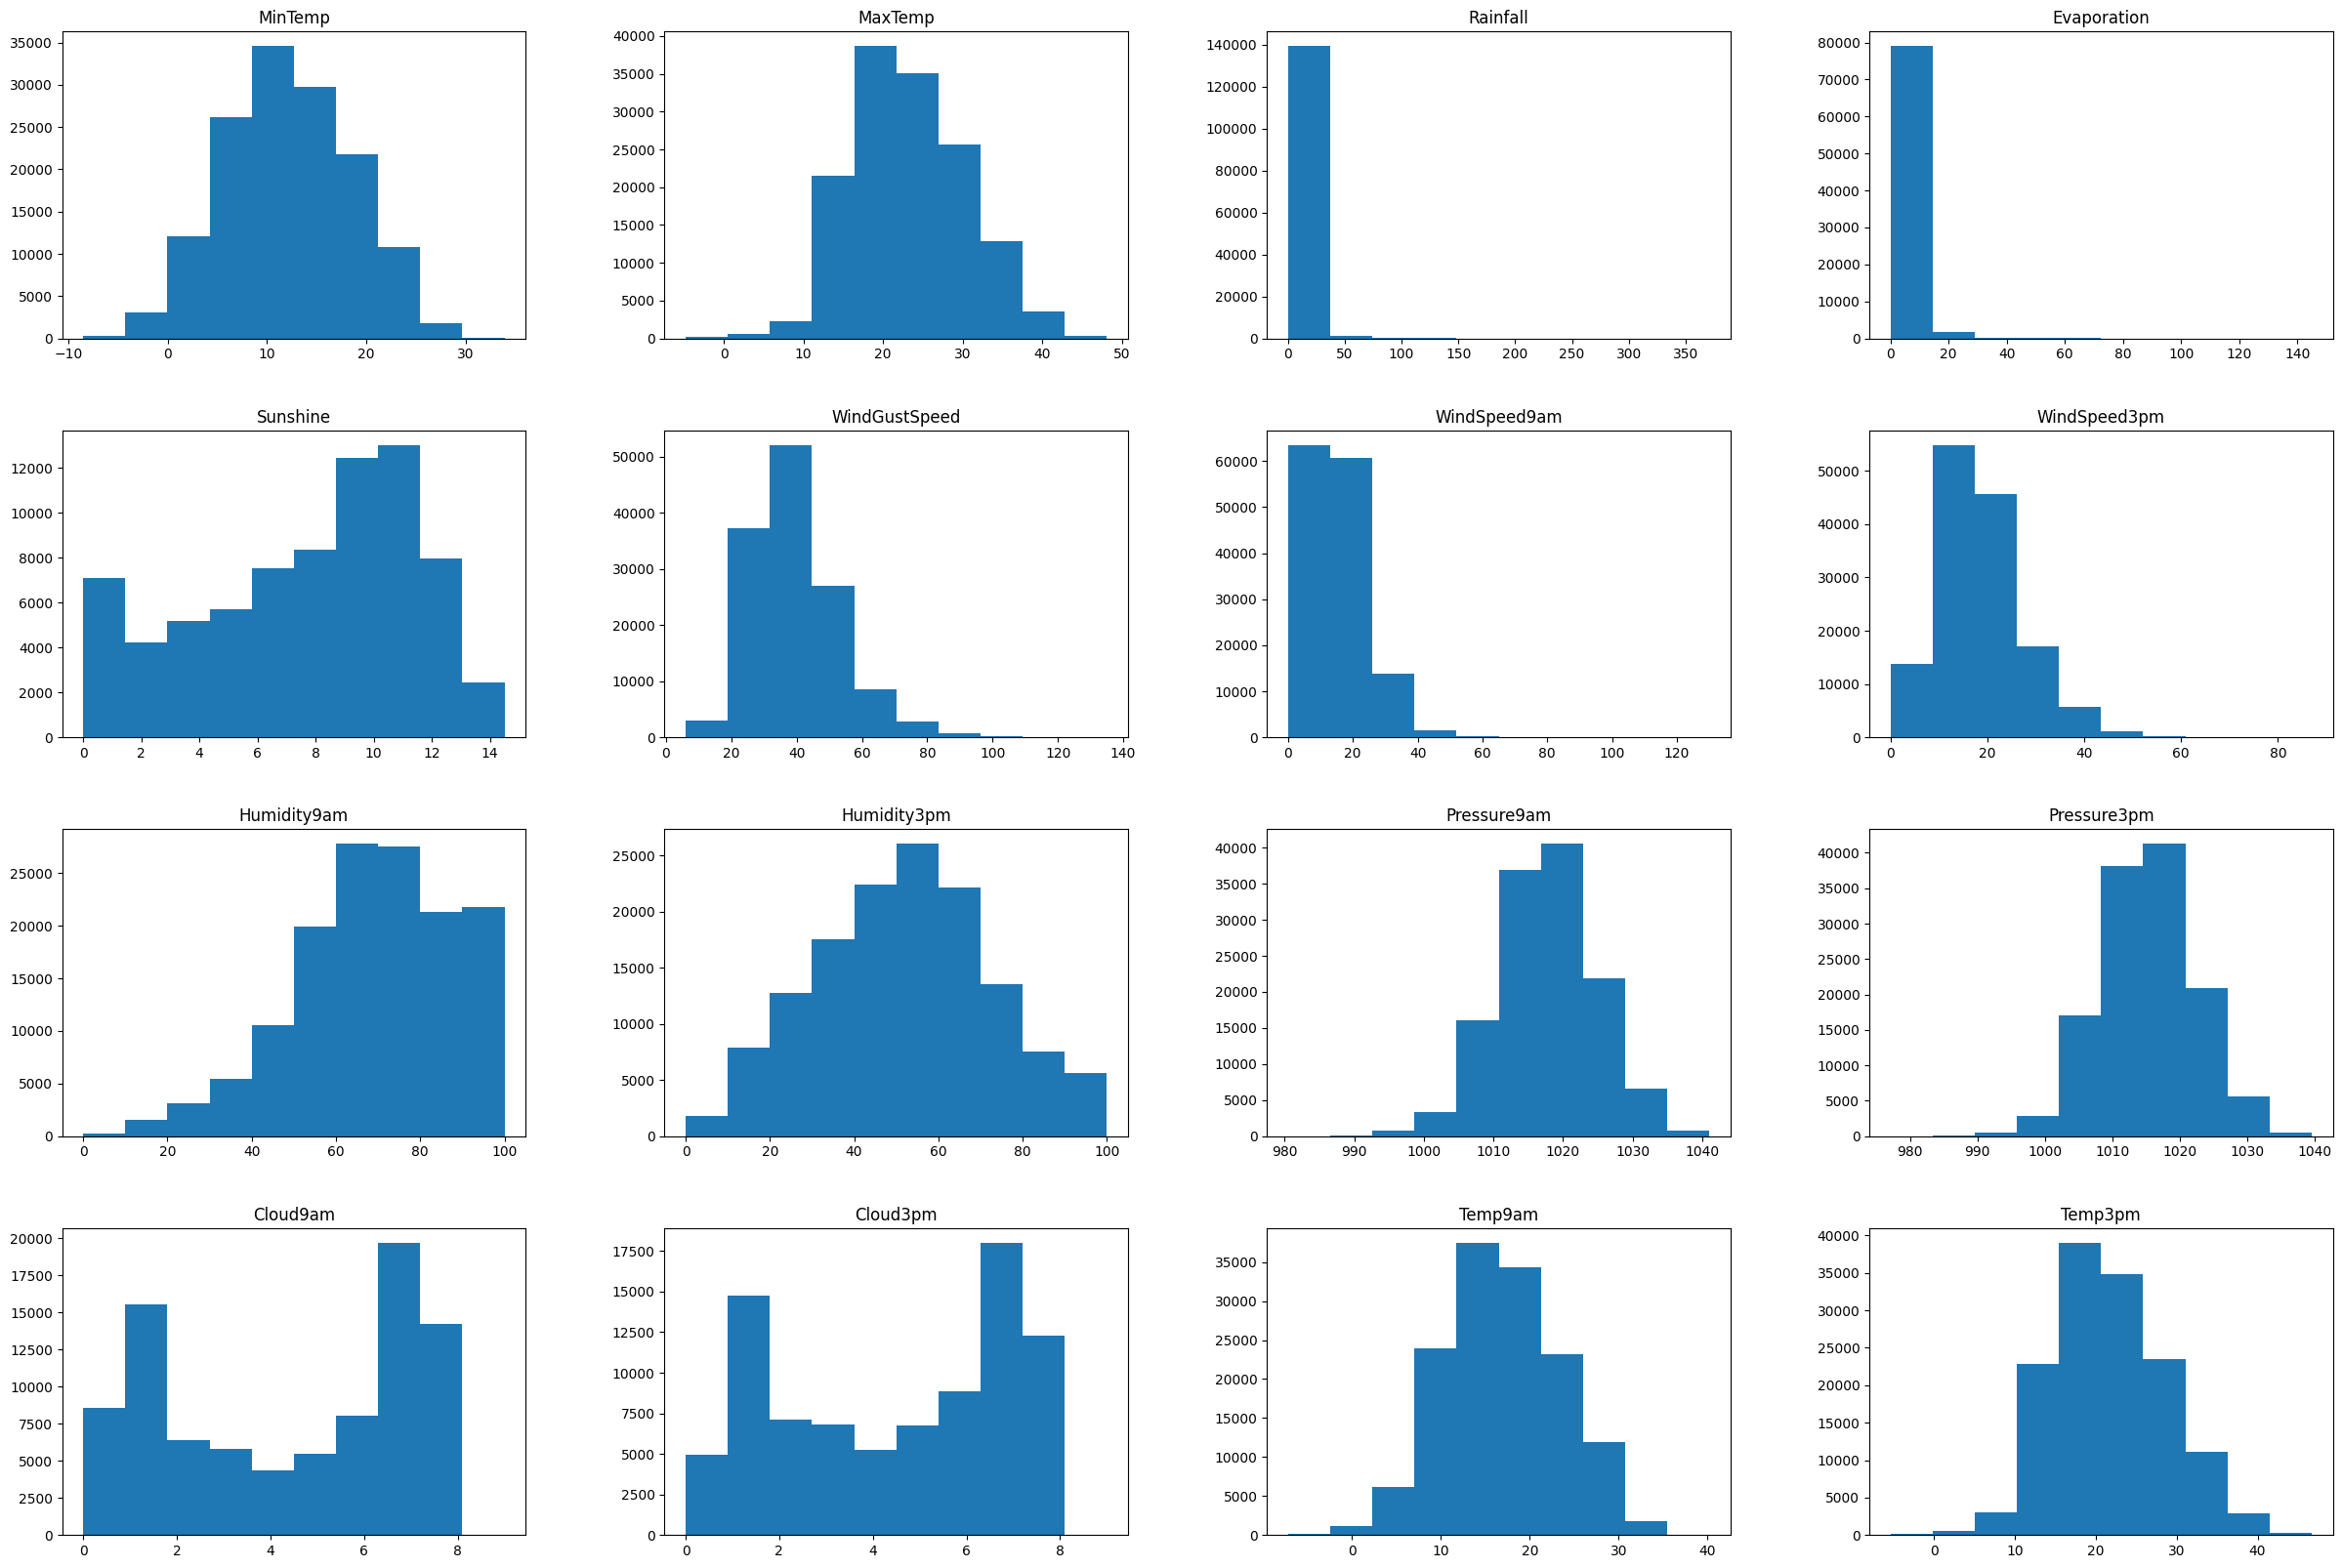

In [9]:
# plt.title("Distribution of Features in the Data")
rain_df.hist(grid=False,figsize=(30,20));

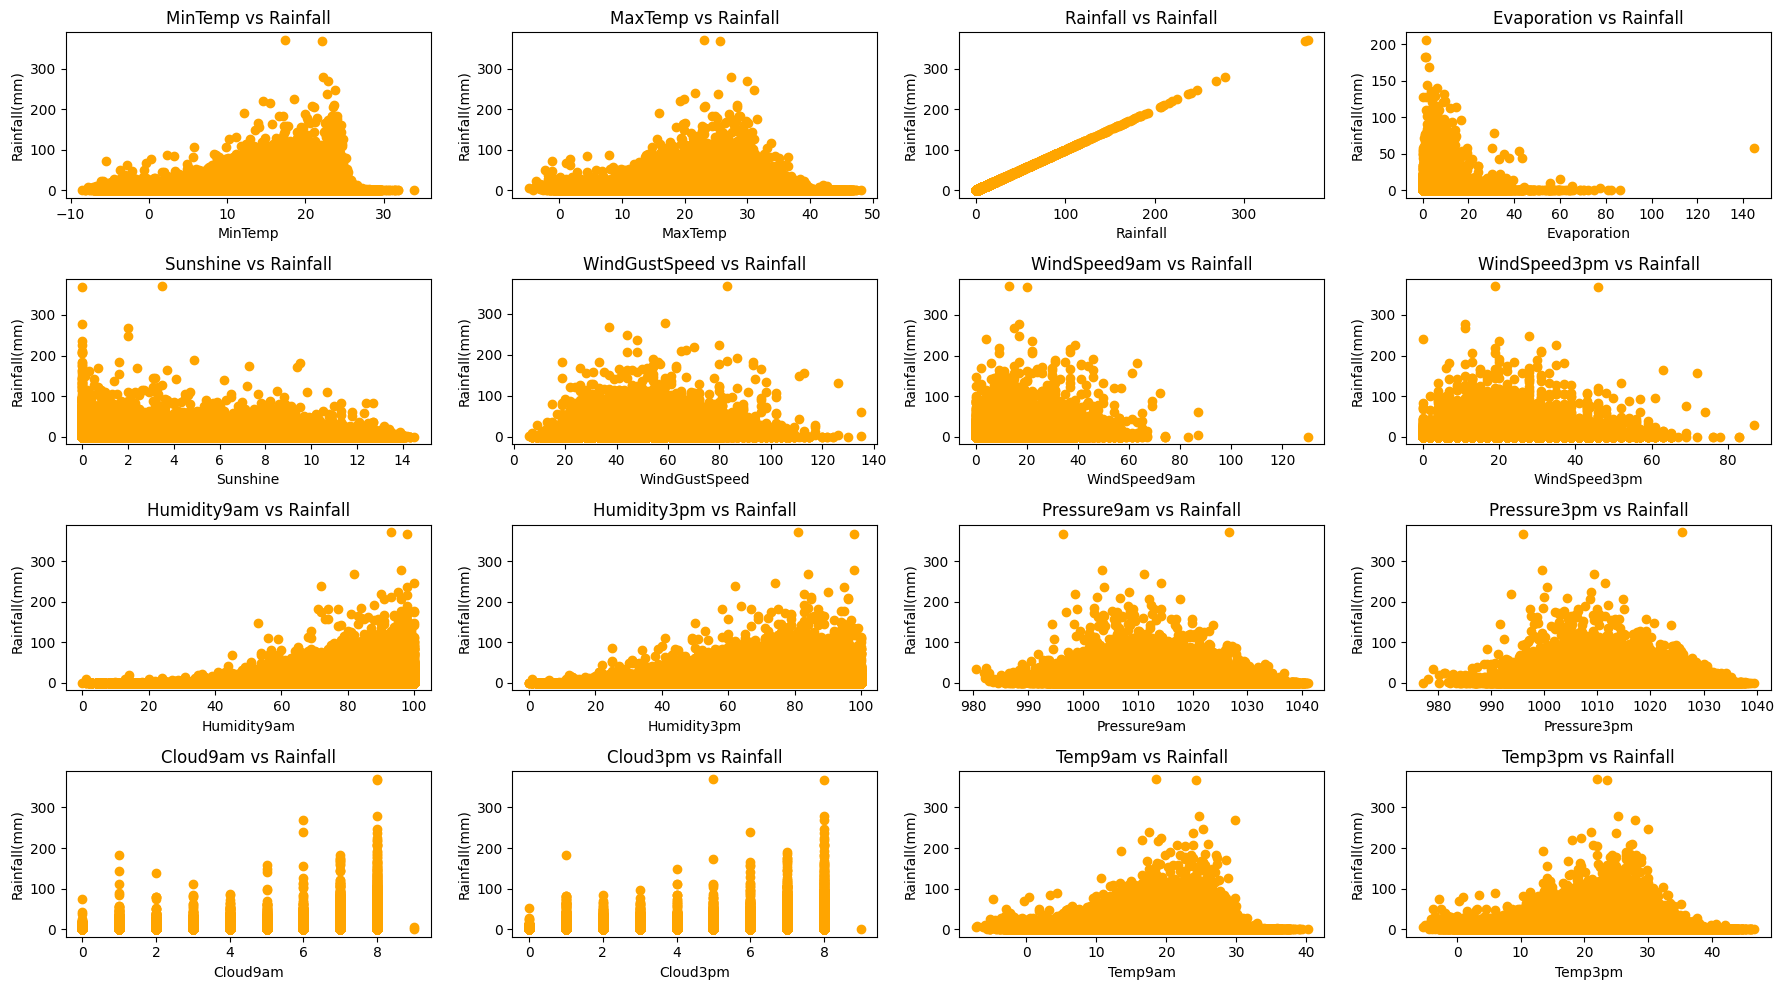

In [10]:
features = [x for x in rain_df.columns if(rain_df[x].dtype!=object)]
fig, axs = plt.subplots(4, 4, figsize=(18, 10)) 
# Important Step
axs = axs.flatten()
for i, feature in enumerate(features):
    axs[i].scatter(rain_df[feature], rain_df['Rainfall'], color='orange', marker='o')
    axs[i].set_title(f'{feature} vs Rainfall')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Rainfall(mm)')
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

##### Above it also becomes important to consider the Location where measurements are made as they can affect the average temp and other factors being recorded around that given area

In [11]:
fig=px.histogram(rain_df,x=rain_df['Location'],color='RainToday',title="Location-Wise Record Distribution")
fig.show()

##### Comparing how the Rain-tommorrow affects the Rain today Graph

In [12]:
fig=px.histogram(rain_df,x='RainTomorrow',color='RainToday')
fig.show()

It can be concluded that there are more number of samples where if raintoday=No then rainTomorrow is most probably=No

#### Sampling the Dataset to be Analysed 
**Whenever we have a datset which is very big in order to analyse the whole dataset we can just use the sample of the dataset and then analyse the dataset based on this extracted sample**

In [13]:
# Sampling Code : 
# use_sample=True/False
# sample_fraction=0.1,etc

# if use_sample:
    # raw_df=raw_df.sample(frac=sample_fraction).copy

#### Building and Model and testing it on different Datasets 
1. `train_set`: Model which will be build will learn from this dataset and try to recognise the pattern using different algorithms and solver 
2. `validation set`: Remember we don't want our model to learn the answers instead we want to build a model which can generalise well and don't overfit . Validation set can be used suring model training to check the scores of the model which has been built using `train_set`
3. `test_set` : Finally after training phaase is completed we will finally test the model on the test_set

In general a 60-20-20 Ratio is Good Indicator for train-val-test train


#### Importance of the time-serires Data 
Time Series data like : Stock-Market, Weather , Football Matches,etc are things which learn from past and try to compute the possible future outcome so 
1. Train-Val-Test set should be built based on timeline rather than radomly splitting the data using the train_test_split
2. Here Depending upon the Data Distribution Lets Try and split the data

In [14]:
# Converting the data to Time-Series Format in the Pandas 
year=pd.to_datetime(rain_df.Date).dt.year    

In [15]:
rain_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145454  2017-06-20    Uluru      3.5  ...     20.9         No            No
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No

[140787 rows x 23 columns]

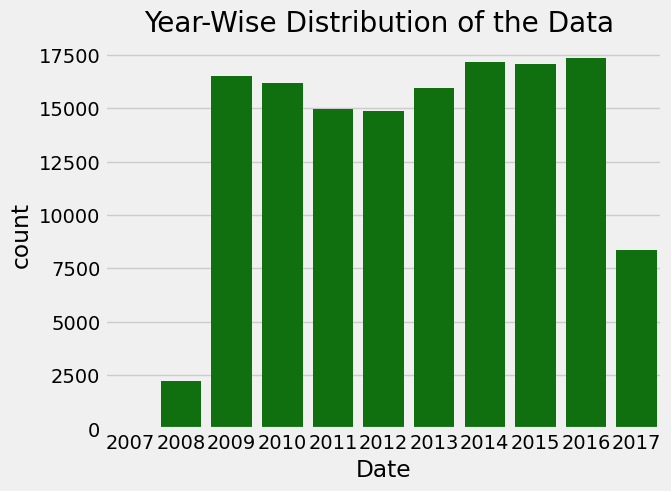

In [16]:
plt.style.use('fivethirtyeight')
plt.title("Year-Wise Distribution of the Data ")
sns.countplot(rain_df,x=pd.to_datetime(rain_df.Date).dt.year,color='green');

In [17]:
train_data=rain_df[year<2015].copy()
val_data =rain_df[year==2015].copy()
test_data=rain_df[year>2015].copy()

In [18]:
train_data.drop(columns=['Date'],inplace=True)
test_data.drop(columns=['Date'],inplace=True)
val_data.drop(columns=['Date'],inplace=True)

In [19]:
print(train_data.shape)
print(test_data.shape)
print(test_data.shape)

(97988, 22)
(25710, 22)
(25710, 22)


Notice that although the Data is not uniformly Dsitrbuted we have given Validation set a Period of One year so that it can possibly Cover all the seasons

#### Identitfying the Input And Target Columns as well as using the Categorical and Numerical Columns
categorical and numeric column can be generally selected by using the `select_dtypes()` function in the pandas 

In [20]:
input_cols=rain_df.drop(columns=['RainTomorrow','Date']).columns.tolist()
target_col='RainTomorrow'

In [21]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [22]:
target_col

'RainTomorrow'

In [23]:
train_inputs=train_data[input_cols].copy()
train_tar=train_data[target_col].copy()
test_input=test_data[input_cols].copy()
test_tar=test_data[target_col].copy()
val_input=val_data[input_cols].copy()
val_target=val_data[target_col].copy()

In [24]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(object).columns.tolist()

In [25]:
print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [26]:
train_data[numeric_cols].describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  97674.000000  97801.000000  ...  97414.000000  97392.000000
mean      12.007831     23.022202  ...     16.835126     21.540138
std        6.347175      6.984397  ...      6.404586      6.831612
min       -8.500000     -4.100000  ...     -5.900000     -5.100000
25%        7.500000     17.900000  ...     12.200000     16.600000
50%       11.800000     22.400000  ...     16.600000     20.900000
75%       16.600000     27.900000  ...     21.400000     26.200000
max       33.900000     48.100000  ...     40.200000     46.100000

[8 rows x 16 columns]

#### Filling in the Missing Values (Imputation)
1. Filling the Values with Mean --> mean can be used to fill the null values when there are no significant amount of outliers present in the data 
2. Median --> In case of Data with Significant amount of outliers if we use the mean it would be distorted hence it is better to use median (Filling Null Values in Case of Salaries)
3. We have to essentially handle the Null values before using the data fo Machine learning as the Algorithm may crash

In [27]:
imputer=SimpleImputer(strategy='mean')
train_inputs[numeric_cols]=imputer.fit_transform(train_inputs[numeric_cols])
val_input[numeric_cols]=imputer.fit_transform(val_input[numeric_cols])
test_input[numeric_cols]=imputer.fit_transform(test_input[numeric_cols])

After Fitting and Transformation they are converted to Numpy Arrays 

In [28]:
train_inputs

Location  MinTemp  MaxTemp  ...  Temp9am  Temp3pm  RainToday
0        Albury     13.4     22.9  ...     16.9     21.8         No
1        Albury      7.4     25.1  ...     17.2     24.3         No
2        Albury     12.9     25.7  ...     21.0     23.2         No
3        Albury      9.2     28.0  ...     18.1     26.5         No
4        Albury     17.5     32.3  ...     17.8     29.7         No
...         ...      ...      ...  ...      ...      ...        ...
144548    Uluru     16.9     33.2  ...     23.7     31.8         No
144549    Uluru     15.1     36.8  ...     28.9     34.8         No
144550    Uluru     17.3     37.8  ...     29.7     35.7         No
144551    Uluru     20.1     38.5  ...     29.8     37.2         No
144552    Uluru     22.5     39.6  ...     30.1     37.4         No

[97988 rows x 21 columns]

Scaling the Features so that the model does not overweight a feature over other  \
Here we will be scaling features on same range for all

In [29]:
scaler=MinMaxScaler()
train_inputs[numeric_cols] =scaler.fit_transform(train_inputs[numeric_cols])
test_input[numeric_cols] = scaler.fit_transform(test_input[numeric_cols])
val_input[numeric_cols]  = scaler.fit_transform(val_input[numeric_cols])


In [30]:
train_inputs.describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483675      0.519582  ...      0.493170      0.520315
std        0.149457      0.133673  ...      0.138521      0.133024
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.377358      0.421456  ...      0.392625      0.423828
50%        0.478774      0.507663  ...      0.488069      0.509766
75%        0.591981      0.613027  ...      0.590022      0.609375
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 16 columns]

All the values have been scaled on the range of (0-1) so that the problem of overweighing a feature above something else does not occur

#### Encoding the Categorical Data for Machine Learning 

In machine learning, several types of encoding techniques are used to handle categorical data. The main types include:

1. **One-Hot Encoding**: 
   - Each category is represented as a binary vector. Each category gets its own column, and the value is set to 1 where the category is present and 0 for all others.
   - Useful for nominal data (categories with no ordinal relationship).
   
2. **Label Encoding**:
   - Each category is assigned a unique integer value. 
   - Useful for ordinal data (categories with an inherent order). 
   - Can sometimes introduce unintended relationships for nominal data.

3. **Ordinal Encoding**:
   - Similar to label encoding, but explicitly used for ordered categories where there’s a meaningful ranking (e.g., "low," "medium," "high").

4. **Binary Encoding**:
   - Each category is first converted to an integer, then transformed into binary format, and each bit gets its own column.
   - Reduces the dimensionality compared to one-hot encoding, which is helpful when there are many categories.

5. **Target Encoding (Mean Encoding)**:
   - Categories are replaced with the mean of the target variable for each category.
   - Useful in supervised learning, but it needs to be handled carefully to avoid data leakage.

6. **Frequency Encoding**:
   - Categories are replaced with the frequency of their occurrences in the dataset.
   - A simple and effective way to represent categorical data.

7. **Hash Encoding**:
   - Hashing trick is applied to encode categories into a fixed number of columns. The categories are transformed using a hash function.
   - Useful when there are many unique categories.

8. **Leave-One-Out Encoding**:
   - Similar to target encoding, but for each data point, the mean target is calculated excluding that point's own target value.
   - Helps reduce overfitting while preserving the predictive power of target encoding.



In [31]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoder.fit(rain_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [32]:
rain_df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

In [33]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [34]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [35]:
# Making a List of all the encoded Columns :
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

**Now we have Successfully Encoded the columns and are now ready to implement integrate the columns with our Main Data which will be used for training our `LogisticRegression` Model after fiiting the values**

In [36]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [37]:
type(encoder.transform(train_inputs[categorical_cols]))

numpy.ndarray

#### Constant Error Because of irregular Data Type Conversion During Assigning new Columns using the `OneHotEncoder(sparse_output=True(defualt))`
sparse_outputbool, default=True
When True, it returns a `scipy.sparse.csr_matrix`, i.e. a sparse matrix in “Compressed Sparse Row” (CSR) format.
If False it would Simply Return the `np.ndarray`

In [38]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_input[encoded_cols]=encoder.transform(val_input[categorical_cols])
test_input[encoded_cols]=encoder.transform(test_input[categorical_cols])

C:\Users\Sian\AppData\Local\Temp\ipykernel_6308\944954418.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Sian\AppData\Local\Temp\ipykernel_6308\944954418.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Sian\AppData\Local\Temp\ipykernel_6308\944954418.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [39]:
print(train_inputs.columns.tolist())

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', '

**Above we have Successfully Encoded the data and we are good to Train the Model on this Given Data**
Note the following : 
1. In case of Scikitlearn The target columns if categorical are handled by the libraries 
2. Input Columns must be strictly Numeric

#### Note that after Preprocessing the Data it is better to save the  so that the progress is not Lost 
1. One of the Most famous formats to save the data is `parquet`
2. Or another way to save the data is in the CSV `csv` format 

#### Model Traning and Evaluation 

In [40]:
model =LogisticRegression(solver='liblinear')

Fitting a Logistic Regression for the numeric and encoded columns for traning data 

In [41]:
model.fit(train_inputs[encoded_cols+numeric_cols],train_tar)

LogisticRegression(solver='liblinear')

In [42]:
y_pred_train=model.predict(train_inputs[encoded_cols+numeric_cols])

In [43]:
print(f"Accuracy Score for the Given Data is :{accuracy_score(y_pred_train,train_tar)}")

Accuracy Score for the Given Data is :0.8519920806629383


In [44]:
print(classification_report(train_tar,y_pred_train))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     76190
         Yes       0.74      0.52      0.61     21798

    accuracy                           0.85     97988
   macro avg       0.80      0.73      0.76     97988
weighted avg       0.84      0.85      0.84     97988



#### Drawing Confusion Matrix By Directly using `ConfusionMatrixDisplay(confusion_matrix=parameter)`
*Remark* --> Here we have to instantiate the object of ConfusionMatrixDisplay to display it 

In [45]:
print(ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(train_tar,y_pred_train)))
# The above value retruns object 

Proper Method od Drawing the `ConfusionMatrix`

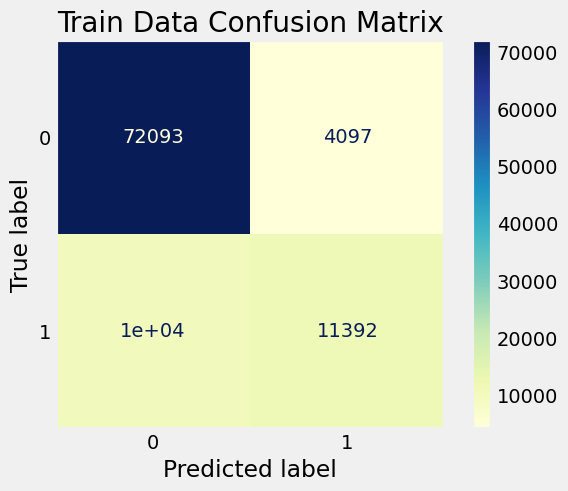

In [46]:
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(train_tar,y_pred_train))
fig = fig.plot(include_values=True, cmap='YlGnBu', ax=None, xticks_rotation='horizontal')
plt.title("Train Data Confusion Matrix")
plt.grid(False)
plt.show()

In [47]:
y_pred_test=model.predict(test_input[encoded_cols+numeric_cols])

In [48]:
print(classification_report(test_tar,y_pred_test))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90     19885
         Yes       0.76      0.44      0.56      5825

    accuracy                           0.84     25710
   macro avg       0.81      0.70      0.73     25710
weighted avg       0.83      0.84      0.83     25710



In [49]:
y_pred_val=model.predict(val_input[encoded_cols+numeric_cols])

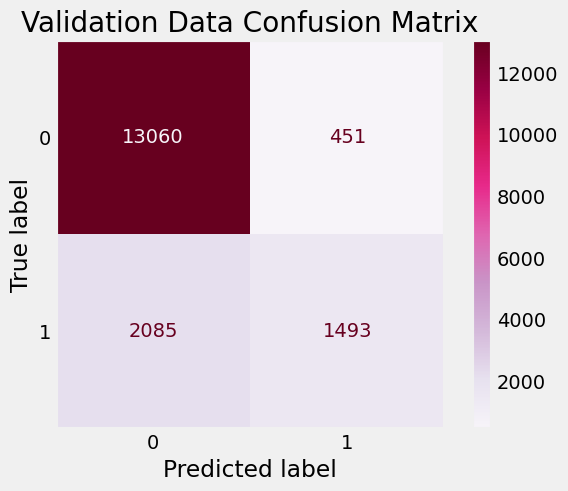

In [50]:
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(val_target,y_pred_val))
fig = fig.plot(include_values=True, cmap='PuRd', ax=None, xticks_rotation='horizontal')
plt.title("Validation Data Confusion Matrix")
plt.grid(False)
plt.show()

In [51]:
print(classification_report(val_target,y_pred_val))

              precision    recall  f1-score   support

          No       0.86      0.97      0.91     13511
         Yes       0.77      0.42      0.54      3578

    accuracy                           0.85     17089
   macro avg       0.82      0.69      0.73     17089
weighted avg       0.84      0.85      0.83     17089



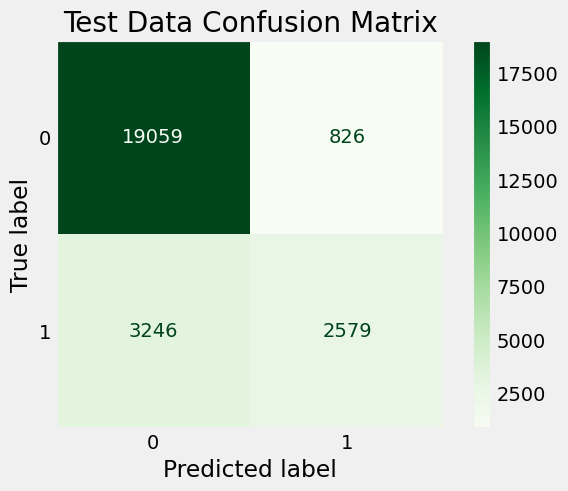

In [52]:
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_tar,y_pred_test))
fig = fig.plot(include_values=True, cmap='Greens', ax=None, xticks_rotation='horizontal')
plt.title("Test Data Confusion Matrix")
plt.grid(False)
plt.show()

#### Reciever Operator Characteristic Curve 
Plotting the curve at every threshold using :
To plot the ROC AUC curve for a model in scikit-learn, you can follow these steps:

1. Train your model: Train your classification model using scikit-learn’s API. For example, if you’re using a logistic regression model, you can use LogisticRegression from sklearn.linear_model.
2. Predict probabilities: Use the trained model to predict probabilities for your test data. You can do this using the `predict_proba` method, which returns an array of probabilities for each class.
3. Calculate true positive rates (TPR) and false positive rates (FPR): Use the `roc_curve` function from sklearn.metrics to calculate the TPR and FPR for each threshold. This function takes the true labels and predicted probabilities as input and returns the FPR, TPR, and thresholds.
4. Plot the ROC curve: Use a plotting library like matplotlib to plot the ROC curve. You can use the plot function to create a line plot with the FPR on the x-axis and TPR on the y-axis.
5. Calculate the AUC: Use the auc function from sklearn.metrics to calculate the area under the ROC curve (AUC). This function takes the FPR and TPR arrays as input and returns the AUC.

**Here `test_proba` will return the probabilty predicted for both the classes `Positive` as well as `Negative` classes but we have to selec the probability predicted for Positive Classes** 

In [62]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [65]:
test_proba=model.predict_proba(test_input[encoded_cols+numeric_cols])[:,1]
print(test_proba)
print(test_proba.shape)


[0.05401875 0.13634587 0.44294208 ... 0.00562138 0.01678004 0.00743   ]
(25710,)


**Note that for `roc_curve(y_true,y_prdict/y_pred_probab)` the `y_true` Value Must be  Value in {0,1} if not than the `pos_label` must be explicitly mentioned**

In [74]:
label=LabelBinarizer()

In [78]:
fpr,tpr,thresholds=roc_curve(label.fit_transform(test_tar),test_proba)

In [79]:
test_tar.describe()

count     25710
unique        2
top          No
freq      19885
Name: RainTomorrow, dtype: object

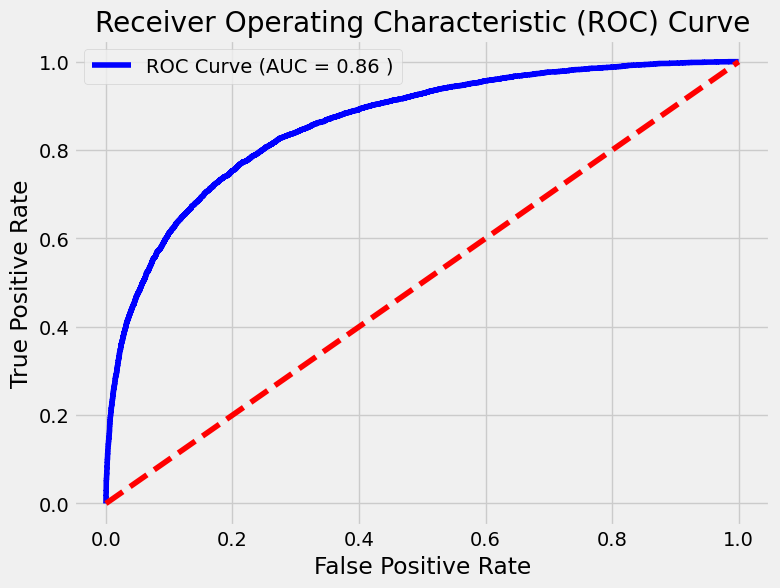

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(test_tar,test_proba):.2f} )')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Removing Feature Importance Using the Train Data 

#### Pending Work: 
1. Remove Feature Importance for Each Feature 
2. Draw Receiver Operator characteristic curve 
3. Comeple the remaining Assignment 

#### Saving the Trained Model and all the Parameters which were used to train the model

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [86]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [87]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']